To be run after 5a)

In [1]:
import blocksci

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [3]:
import datetime

In [4]:
import utils

In [5]:
from analysis import assess_accuracy, df_accuracy_over_time

In [6]:
sns.set_theme()

In [7]:
plot_args = {"ylim":(0, 1.05), "xlim": (datetime.datetime(2011, 1, 1), None), "figsize": (8, 5)}

In [8]:
import collections
import random

In [9]:
chain = blocksci.Blockchain(utils.blocksci_config())

In [10]:
my_cm = blocksci.cluster.ClusterManager(utils.latest_clustering(), chain)

In [11]:
cluster_member = blocksci.heuristics.change.cluster_member(my_cm)

### Assess accuracy of change heuristics

In [12]:
gt = blocksci.GroundTruth(utils.latest_groundtruth(), chain)

In [13]:
gt.transactions().size

35257428

In [14]:
%time true_change = gt.transactions().map(lambda tx: cluster_member(tx).index)

CPU times: user 36.7 s, sys: 3.78 s, total: 40.5 s
Wall time: 40.3 s


In [15]:
%time true_ts = gt.transactions().map(lambda tx: tx.block.time)

CPU times: user 4.78 s, sys: 506 ms, total: 5.29 s
Wall time: 5.28 s


In [16]:
monthly_tx_count = pd.Series(true_change, index=true_ts).resample("1 M").count()

In [17]:
def get_change_outputs(heuristic):
    return gt.transactions().map(lambda tx: heuristic.unique_index(tx))

In [18]:
def get_resampled(df_change):
    accuracy = df_change.resample("1 M").mean()
    coverage = df_change.resample("1 M").count().divide(monthly_tx_count, axis=0)
    combined =  accuracy.merge(coverage, how="left", left_index=True, right_index=True)
    combined.columns = ["Accuracy", "GT Coverage"]
    return combined

In [19]:
def save_plot(plot, name):
    plot.get_figure().savefig("figures/{}.pdf".format(name), format="pdf")

### Fingerprinter

In [24]:
fp = blocksci.Fingerprinter(utils.latest_fingerprints(), chain)

### Version number

In [25]:
version_heuristic = blocksci.heuristics.change.smart_fingerprint(fp, utils.get_fp_mask(utils.Fingerprint.VERSION_2))
version_filled = get_change_outputs(version_heuristic)

In [26]:
assess_accuracy(version_filled, true_change)

0.984883 & 0.245298 &
Heuristic identified a unique change output in 24.91% of transactions.
Heuristic was correct for 98.49% of identified change outputs.


{'correct': 8648590, 'incorrect': 132751, 'unindentified': 26476087}

In [27]:
df_version_change = df_accuracy_over_time(version_filled, true_change, true_ts)

In [28]:
df_version_resampled = get_resampled(df_version_change)

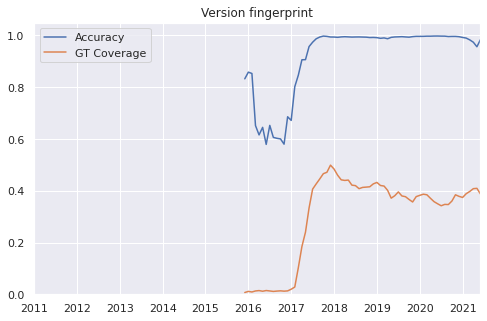

In [29]:
save_plot(df_version_resampled.plot(title="Version fingerprint", **plot_args), "fp_smart_version_accuracy")

### Locktime

In [30]:
locktime_heuristic = blocksci.heuristics.change.smart_fingerprint(fp, utils.get_fp_mask([utils.Fingerprint.LOCKTIME_HEIGHT, utils.Fingerprint.LOCKTIME_TIME]))
locktime_filled = get_change_outputs(locktime_heuristic)

In [31]:
assess_accuracy(locktime_filled, true_change)

0.990549 & 0.306533 &
Heuristic identified a unique change output in 30.95% of transactions.
Heuristic was correct for 99.05% of identified change outputs.


{'correct': 10807560, 'incorrect': 103117, 'unindentified': 24346751}

In [32]:
df_locktime_change = df_accuracy_over_time(locktime_filled, true_change, true_ts)

In [33]:
df_locktime_resampled = get_resampled(df_locktime_change)

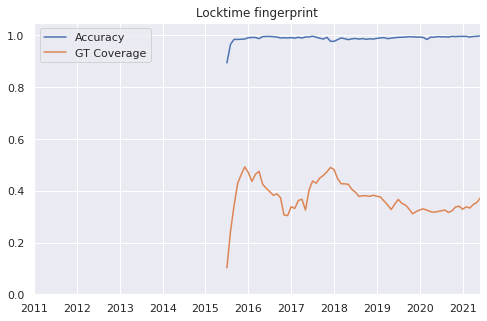

In [34]:
save_plot(df_locktime_resampled.plot(title="Locktime fingerprint", **plot_args), "fp_smart_locktime_accuracy")

### RBF

In [35]:
rbf_heuristic = blocksci.heuristics.change.smart_fingerprint(fp, utils.get_fp_mask(utils.Fingerprint.RBF))
rbf_filled = get_change_outputs(rbf_heuristic)

In [36]:
assess_accuracy(rbf_filled, true_change)

0.965413 & 0.075313 &
Heuristic identified a unique change output in 7.8% of transactions.
Heuristic was correct for 96.54% of identified change outputs.


{'correct': 2655330, 'incorrect': 95130, 'unindentified': 32506968}

In [37]:
df_rbf_change = df_accuracy_over_time(rbf_filled, true_change, true_ts)

In [38]:
df_rbf_resampled = get_resampled(df_rbf_change)

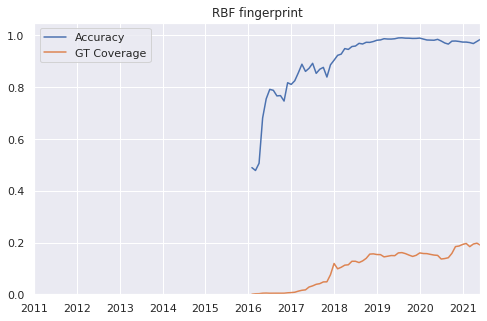

In [39]:
save_plot(df_rbf_resampled.plot(title="RBF fingerprint", **plot_args), "fp_smart_rbf_accuracy")

### Segwit

In [40]:
segwit_heuristic = blocksci.heuristics.change.smart_fingerprint(fp, utils.get_fp_mask(utils.Fingerprint.SEGWIT))
segwit_filled = get_change_outputs(segwit_heuristic)

In [41]:
assess_accuracy(segwit_filled, true_change)

0.901156 & 0.190708 &
Heuristic identified a unique change output in 21.16% of transactions.
Heuristic was correct for 90.12% of identified change outputs.


{'correct': 6723881, 'incorrect': 737515, 'unindentified': 27796032}

In [42]:
df_segwit_change = df_accuracy_over_time(segwit_filled, true_change, true_ts)

In [43]:
df_segwit_resampled = get_resampled(df_segwit_change)

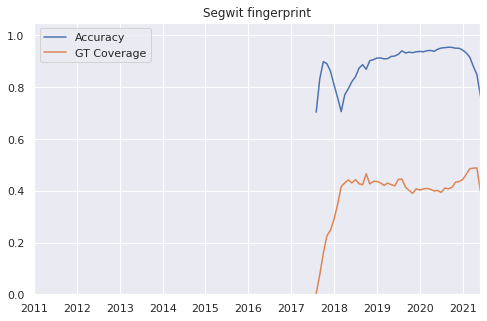

In [44]:
save_plot(df_segwit_resampled.plot(title="Segwit fingerprint", **plot_args), "fp_smart_segwit_accuracy")

### Segwit-compatible

In [45]:
possible_segwit_heuristic = blocksci.heuristics.change.smart_fingerprint(fp, utils.get_fp_mask(utils.Fingerprint.SEGWIT_COMPATIBLE))
possible_segwit_filled = get_change_outputs(possible_segwit_heuristic)

In [46]:
assess_accuracy(possible_segwit_filled, true_change)

0.965623 & 0.02142 &
Heuristic identified a unique change output in 2.22% of transactions.
Heuristic was correct for 96.56% of identified change outputs.


{'correct': 755225, 'incorrect': 26887, 'unindentified': 34475316}

In [47]:
df_possible_segwit_change = df_accuracy_over_time(possible_segwit_filled, true_change, true_ts)

In [48]:
df_possible_segwit_resampled = get_resampled(df_possible_segwit_change)

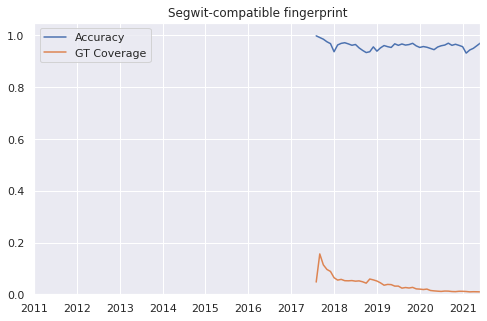

In [49]:
save_plot(df_possible_segwit_resampled.plot(title="Segwit-compatible fingerprint", **plot_args), "fp_smart_possible_segwit_accuracy")

### Ordered inputs & outputs

In [50]:
ordered_inouts_heuristic = blocksci.heuristics.change.smart_fingerprint(fp, utils.get_fp_mask(utils.Fingerprint.SORTED_INOUTS))
ordered_inouts_filled = get_change_outputs(ordered_inouts_heuristic)

In [51]:
assess_accuracy(ordered_inouts_filled, true_change)

0.831955 & 0.261993 &
Heuristic identified a unique change output in 31.49% of transactions.
Heuristic was correct for 83.2% of identified change outputs.


{'correct': 9237208, 'incorrect': 1865804, 'unindentified': 24154416}

In [52]:
df_ordered_inouts_change = df_accuracy_over_time(ordered_inouts_filled, true_change, true_ts)

In [53]:
df_ordered_inouts_resampled = get_resampled(df_ordered_inouts_change)

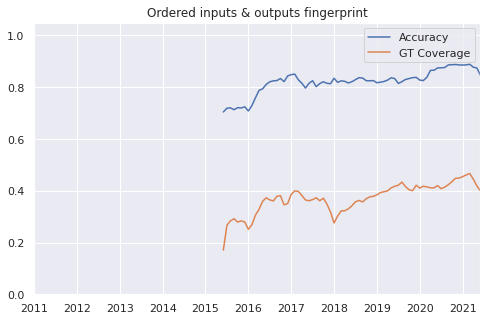

In [54]:
save_plot(df_ordered_inouts_resampled.plot(title="Ordered inputs & outputs fingerprint", **plot_args), "fp_smart_ordered_inouts_accuracy")

### Address Type Fingerprint

In [55]:
ADDRESS_FP2 = [utils.Fingerprint.MULTISIG, utils.Fingerprint.P2PKH, utils.Fingerprint.P2SH, utils.Fingerprint.P2WPKH, utils.Fingerprint.P2WSH, utils.Fingerprint.ADDRESS_OTHER]
addresstype2_heuristic = blocksci.heuristics.change.smart_fingerprint(fp, utils.get_fp_mask(ADDRESS_FP2))
addresstype2_filled = get_change_outputs(addresstype2_heuristic)

In [56]:
assess_accuracy(addresstype2_filled, true_change)

0.92776 & 0.294188 &
Heuristic identified a unique change output in 31.71% of transactions.
Heuristic was correct for 92.78% of identified change outputs.


{'correct': 10372319, 'incorrect': 807635, 'unindentified': 24077474}

In [57]:
df_addresstype2_change = df_accuracy_over_time(addresstype2_filled, true_change, true_ts)

In [58]:
df_addresstype2_resampled = get_resampled(df_addresstype2_change)

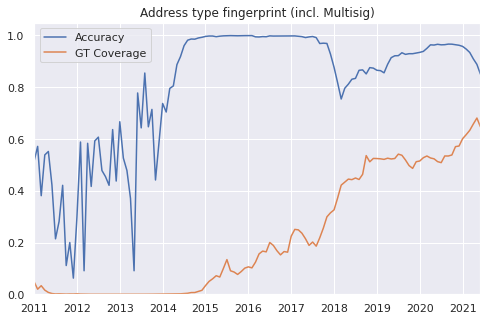

In [59]:
save_plot(df_addresstype2_resampled.plot(title="Address type fingerprint (incl. Multisig)", **plot_args), "fp_smart_addresstype_full_accuracy")

#### P2SH

In [60]:
p2sh_heuristic = blocksci.heuristics.change.smart_fingerprint(fp, utils.get_fp_mask(utils.Fingerprint.P2SH))
p2sh_filled = get_change_outputs(p2sh_heuristic)

In [61]:
assess_accuracy(p2sh_filled, true_change)

0.946294 & 0.268645 &
Heuristic identified a unique change output in 28.39% of transactions.
Heuristic was correct for 94.63% of identified change outputs.


{'correct': 9471747, 'incorrect': 537561, 'unindentified': 25248120}

In [62]:
df_p2sh_change = df_accuracy_over_time(p2sh_filled, true_change, true_ts)

In [63]:
df_p2sh_resampled = get_resampled(df_p2sh_change)

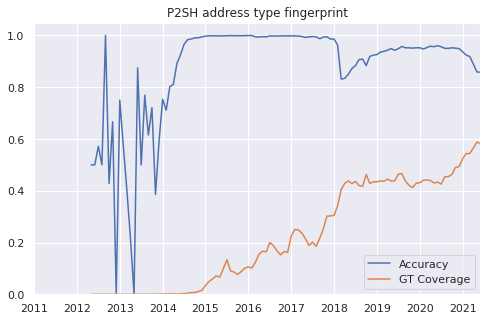

In [64]:
save_plot(df_p2sh_resampled.plot(title="P2SH address type fingerprint", **plot_args), "fp_smart_p2sh_accuracy")

#### P2WPKH

In [65]:
p2wpkh_heuristic = blocksci.heuristics.change.smart_fingerprint(fp, utils.get_fp_mask(utils.Fingerprint.P2WPKH))
p2wpkh_filled = get_change_outputs(p2wpkh_heuristic)

In [66]:
assess_accuracy(p2wpkh_filled, true_change)

0.904832 & 0.180882 &
Heuristic identified a unique change output in 19.99% of transactions.
Heuristic was correct for 90.48% of identified change outputs.


{'correct': 6377433, 'incorrect': 670765, 'unindentified': 28209230}

In [67]:
df_p2wpkh_change = df_accuracy_over_time(p2wpkh_filled, true_change, true_ts)

In [68]:
df_p2wpkh_resampled = get_resampled(df_p2wpkh_change)

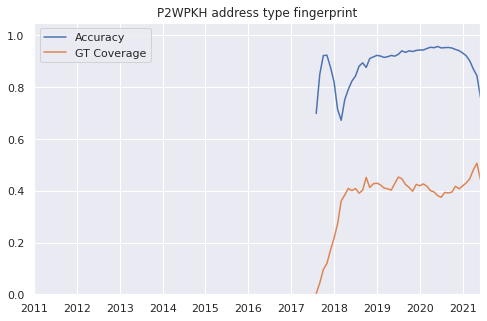

In [69]:
save_plot(df_p2wpkh_resampled.plot(title="P2WPKH address type fingerprint", **plot_args), "fp_smart_p2wpkh_accuracy")

#### P2WSH

In [70]:
p2wsh_heuristic = blocksci.heuristics.change.smart_fingerprint(fp, utils.get_fp_mask(utils.Fingerprint.P2WSH))
p2wsh_filled = get_change_outputs(p2wsh_heuristic)

In [71]:
assess_accuracy(p2wsh_filled, true_change)

0.897871 & 0.06311 &
Heuristic identified a unique change output in 7.03% of transactions.
Heuristic was correct for 89.79% of identified change outputs.


{'correct': 2225083, 'incorrect': 253095, 'unindentified': 32779250}

In [72]:
df_p2wsh_change = df_accuracy_over_time(p2wsh_filled, true_change, true_ts)

In [73]:
df_p2wsh_resampled = get_resampled(df_p2wsh_change)

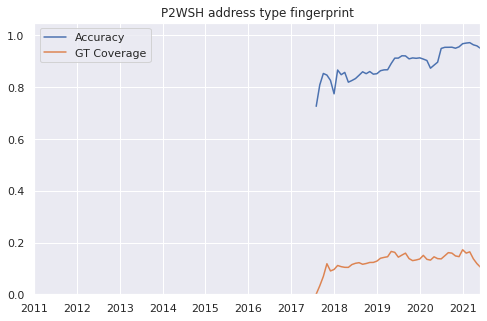

In [74]:
save_plot(df_p2wsh_resampled.plot(title="P2WSH address type fingerprint", **plot_args), "fp_smart_p2wsh_accuracy")

### Export prediction data

In [75]:
utils.latest_regular_prediction()

'/home/ubuntu/Data/heuristics/20210709_heuristics_prediction.csv'

In [76]:
predictions = pd.read_csv(utils.latest_regular_prediction(), index_col=0)

/home/ubuntu/.local/lib/python3.6/site-packages/numpy/lib/arraysetops.py:580: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


In [77]:
assert len(predictions) == len(version_filled)

In [78]:
predictions.tail()

,true_change,optimal_change,optimal_change_with_fee,address_type,power_of_ten_2,power_of_ten_3,power_of_ten_4,power_of_ten_5,power_of_ten_6,power_of_ten_7,...,fp_zeroconf,fp_multisig,fp_p2pkh,fp_p2sh,fp_p2wpkh,fp_p2wsh,fp_address_type,fp_absolute_fee,fp_relative_fee,two_hops
652608322,1,-1,-1,-1,-1,-1,-1,-1,-1,-1,...,0,-1,-1,1,-1,-1,1,-1,-1,-1
652608602,1,1,1,1,1,1,1,1,-1,-1,...,-1,-1,-1,1,-1,-1,1,-1,-1,-1
652608816,1,-1,-1,-1,-1,-1,-1,-1,-1,-1,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1
652608896,1,-1,-1,-1,-1,-1,-1,-1,-1,-1,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1
652614373,0,0,0,0,0,-1,-1,-1,-1,-1,...,-1,-1,0,-1,-1,-1,0,-1,-1,-1


In [79]:
predictions.drop(columns=[
    "fp_version",
    "fp_locktime",
    "fp_rbf",
    "fp_segwit",
    "fp_possible_segwit",
    "fp_ordered_inouts",
    "fp_p2sh",
    "fp_p2wsh",
    "fp_p2wpkh",
    "fp_address_type"], inplace=True)

In [80]:
predictions["fp_version"] = version_filled
predictions["fp_locktime"] = locktime_filled
predictions["fp_rbf"] = rbf_filled
predictions["fp_segwit"] = segwit_filled
predictions["fp_possible_segwit"] = possible_segwit_filled
predictions["fp_ordered_inouts"] = ordered_inouts_filled
predictions["fp_address_type"] = addresstype2_filled
predictions["fp_p2sh"] = p2sh_filled
predictions["fp_p2wsh"] = p2wsh_filled
predictions["fp_p2wpkh"] = p2wpkh_filled

In [81]:
predictions.to_csv("/home/ubuntu/Data/heuristics/20210720_smart_prediction.csv")